## 2.2.1 导入工具包

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

## 2.2.2 导入数据集

In [26]:
train_data_file = "./zhengqi_train.txt"
test_data_file = "./zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep="\t",encoding="utf-8")
test_data = pd.read_csv(test_data_file, sep="\t", encoding="utf-8")

## 2.2.3 查看数据

In [27]:
#train_data.info()

In [28]:
#test_data.info()

In [29]:
#train_data.describe()

In [30]:
#test_data.describe()

In [31]:
#train_data.head()

In [32]:
#test_data.head()

## 2.2.4 可视化数据分布

<AxesSubplot:xlabel='V0'>

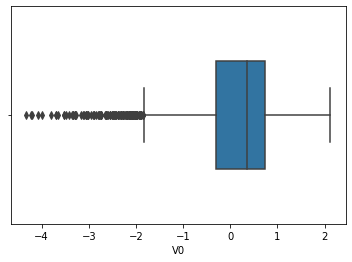

In [33]:
fig = plt.figure(figsize = (6, 4))
sns.boxplot(train_data['V0'], orient="v", width=0.5)

In [34]:
train_data.columns

Index(['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'target'],
      dtype='object')

## 箱型图

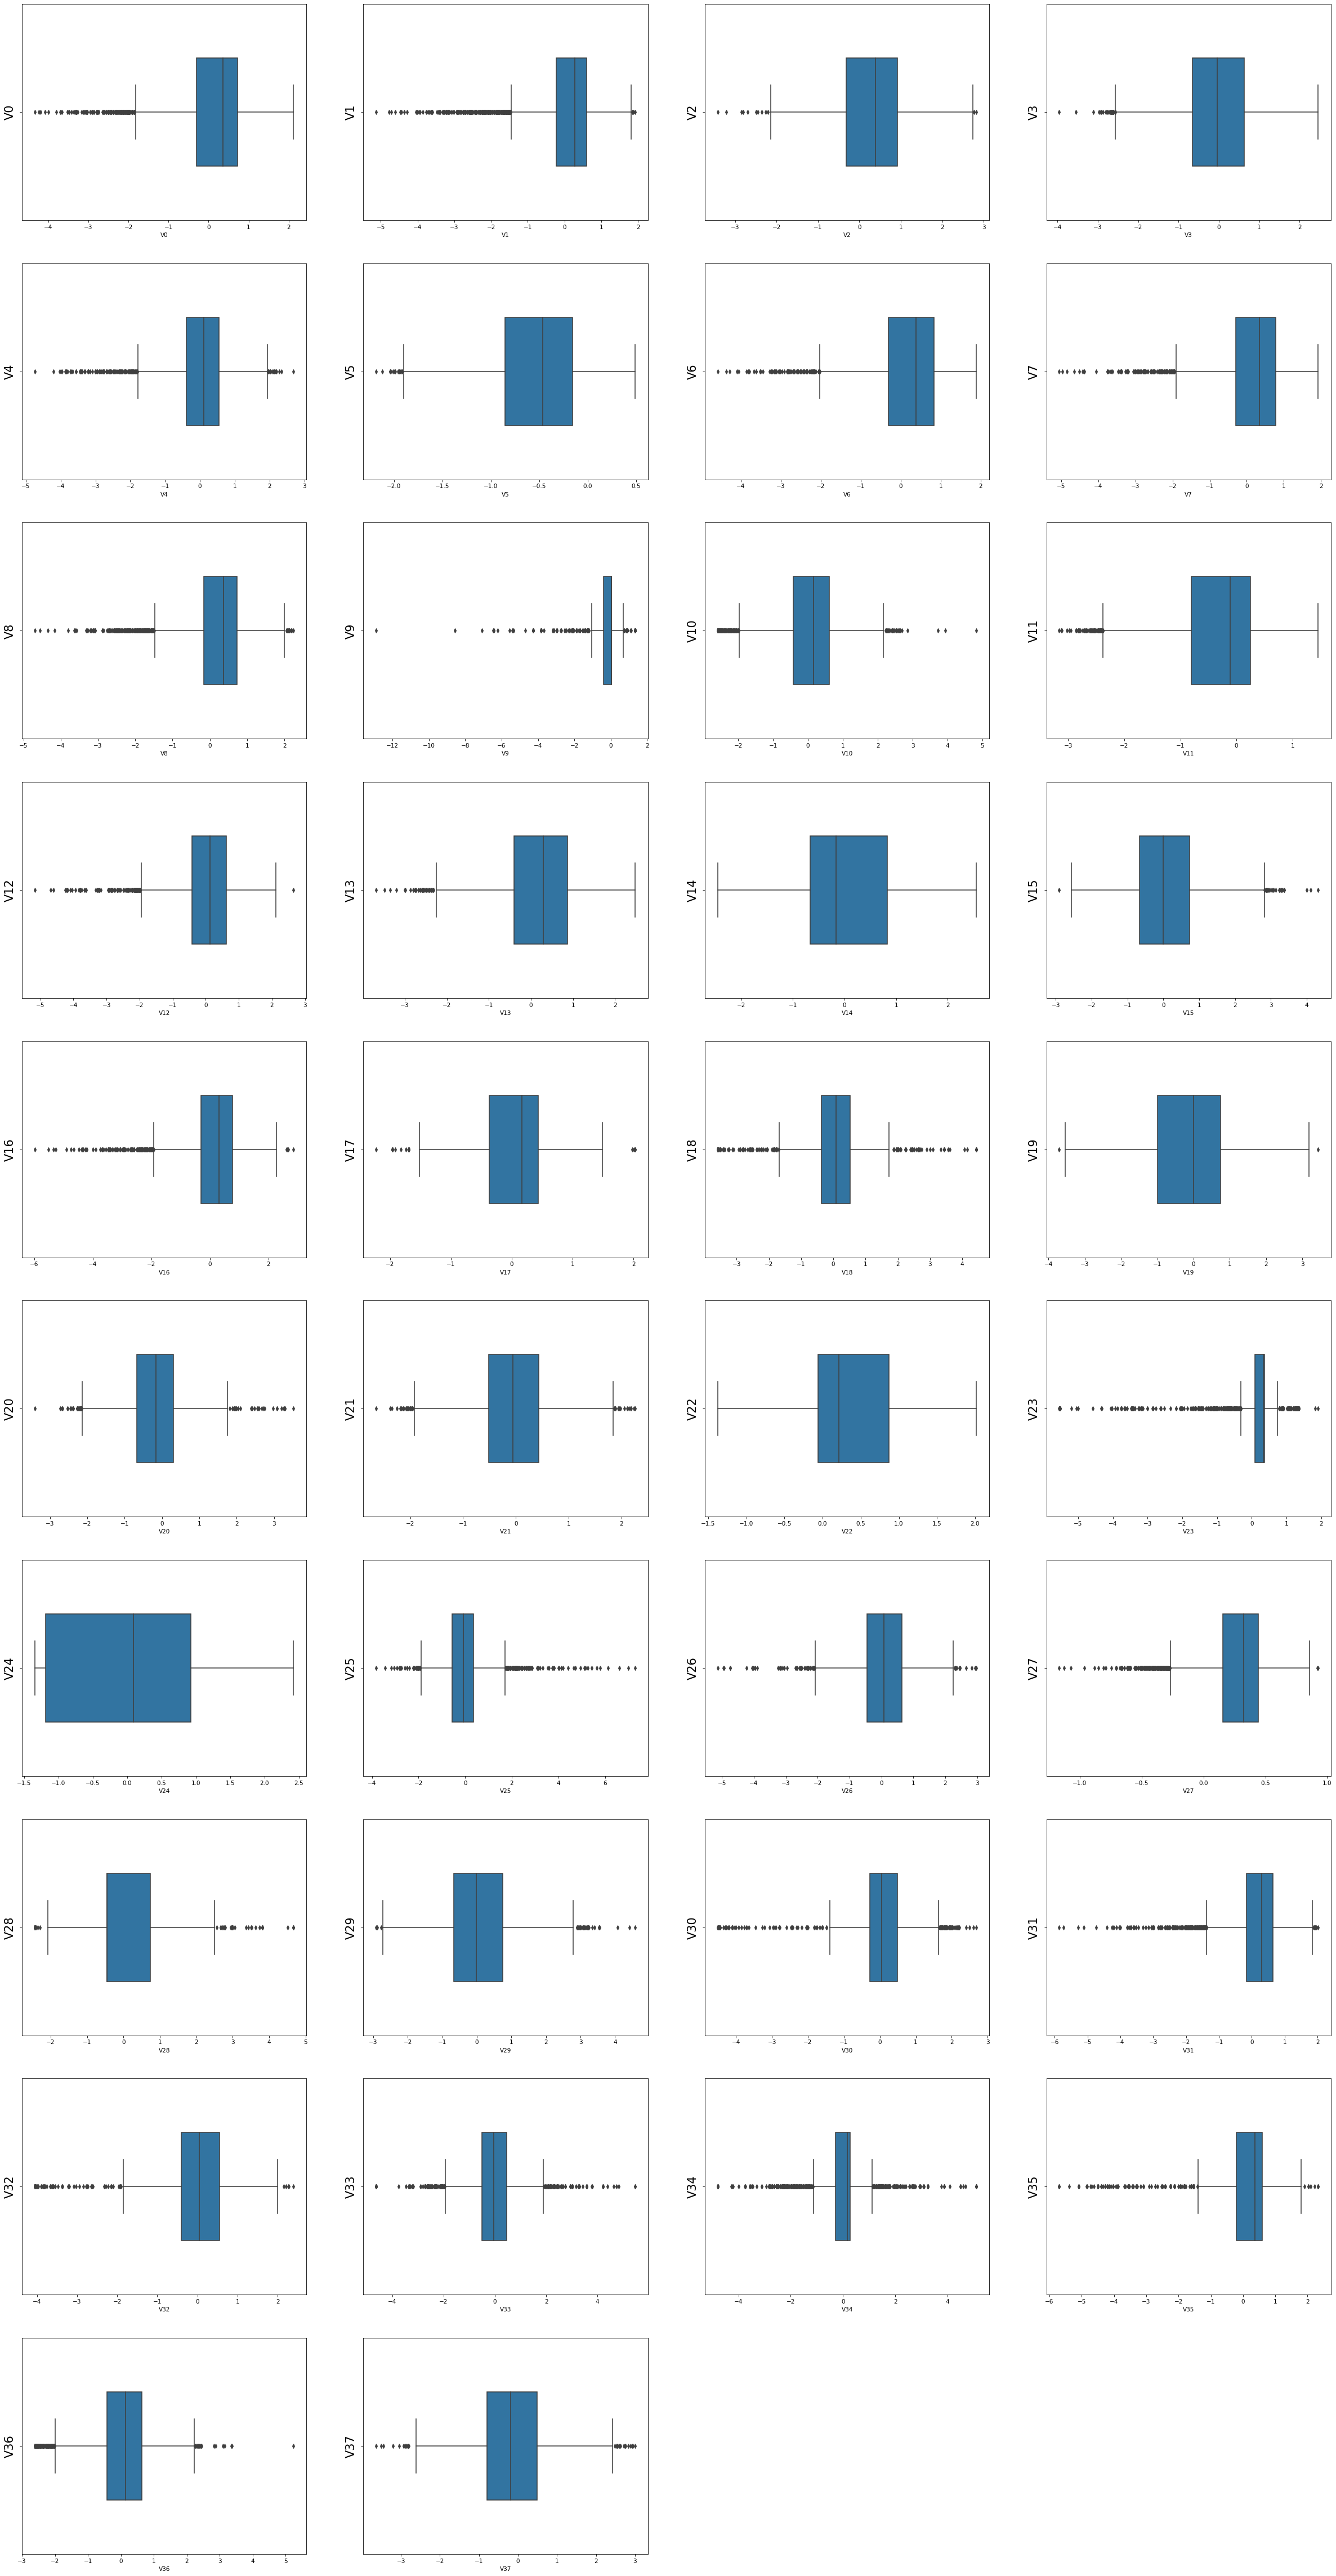

In [38]:
column = train_data.columns.to_list()[:39]
fig = plt.figure(figsize=(40, 80), dpi=75)
for i in range(38):
    plt.subplot(10, 4, i + 1)
    sns.boxplot(train_data[column[i]], orient="v", width=0.5)
    plt.ylabel(column[i], fontsize=20)
plt.show()

## 通过岭回归找出异常值

In [36]:
# function to detect outliers based on the predictions of a model 
def find_outliers(model, X, y, sigma=3): # X:feature y:label
    # predict y values using model
    try:
        y_pred = pd.Series(model.predict(X), index=y.index)
    # if predicting failed, try fitting the model first
    except:
        model.fit(X, y)
        y_pred = pd.Series(model.predict(X), index=y.index)
        
    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    
    # calculate a statistic, define outliers to be where z >sigma
    z = (resid - mean_resid) / std_resid
    outliers = z[abs(z) > sigma].index
    
    # print and plot the results 
    print('R2=', model.score(X,y))
    print('mse=', mean_squared_error(y,y_pred))
    print('-----------------------------------')
    
    print('mean of residuals:', mean_resid)
    print('std of residuals:' , std_resid)
    print('-----------------------------------')
    
    print(len(outliers),'outliers:')
    print(outliers.tolist())
    
    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y ,y_pred, '.')
    plt.plot(y.loc[outliers], y_pred.loc[outliers], 'ro')
    plt.legend(['Accepted','Outliers'])
    plt.xlabel('y')
    plt.ylabel('y_pred')    
    
    ax_132 = plt.subplot(1,3,2)
    plt.plot(y ,y - y_pred, '.')
    plt.plot(y.loc[outliers], y.loc[outliers] - y_pred.loc[outliers], 'ro')
    plt.legend(['Accepted','Outliers'])
    plt.xlabel('y')
    plt.ylabel('y_pred')
    
    ax_133 = plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax= ax_133)
    z.loc[outliers].plot.hist(color='r', bins=50, ax=ax_133)
    plt.legend(['Accepted','Outliers'])
    plt.xlabel('z')
    
    plt.savefig('outliers.png')
    
    return outliers


R2= 0.8890858938210386
mse= 0.10734857773123635
-----------------------------------
mean of residuals: -1.214786966002595e-17
std of residuals: 0.3276976673193502
-----------------------------------
31 outliers:
[321, 348, 376, 777, 884, 1145, 1164, 1310, 1458, 1466, 1484, 1523, 1704, 1874, 1879, 1979, 2002, 2279, 2528, 2620, 2645, 2647, 2667, 2668, 2669, 2696, 2767, 2769, 2807, 2842, 2863]


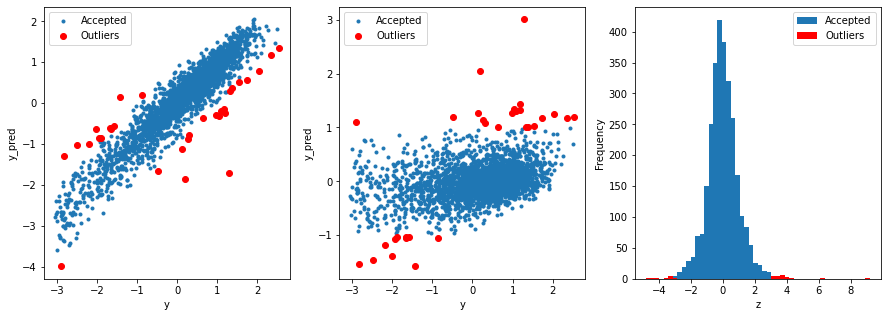

In [37]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X_train = train_data.iloc[:, 0:-1]
y_train = train_data.iloc[:, -1]


from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
X_train = train_data.iloc[:,0:-1]
y_train = train_data.iloc[:,-1]
outliers = find_outliers(Ridge(), X_train, y_train)

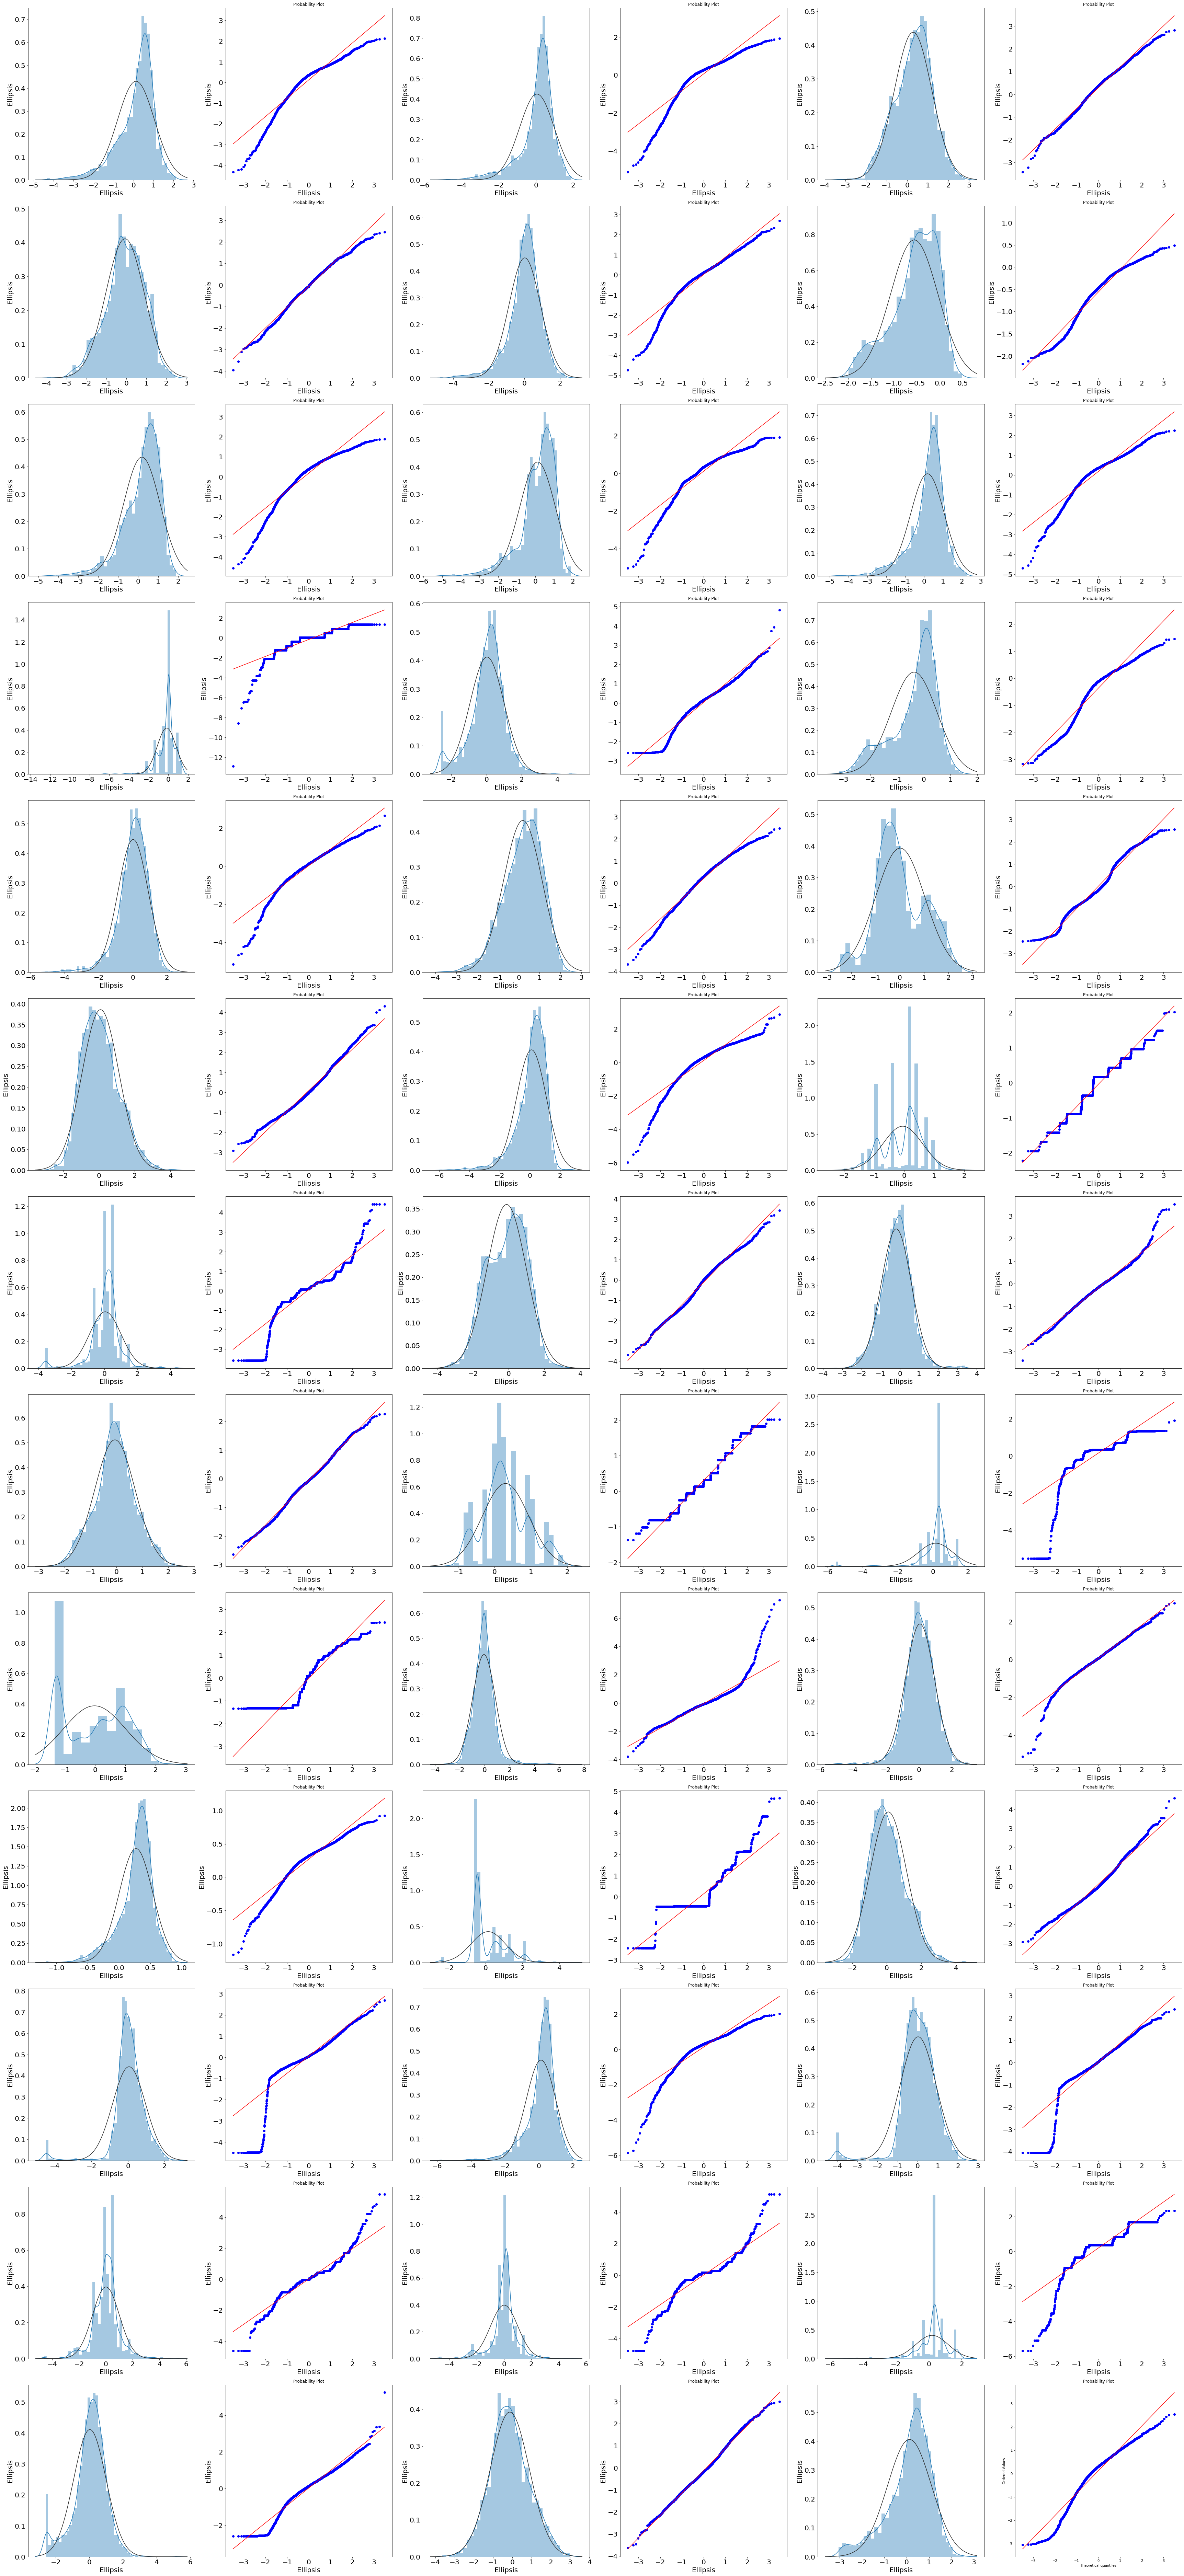

In [46]:
train_cols = 6
train_rows = len(train_data.columns)
plt.figure(figsize=(8*train_cols,8* train_rows))

i = 0
for col in train_data.columns:
    i+=1
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    # 设置坐标标签字体大小
    ax = plt.subplot(train_rows, train_cols, i)
    ax.set_xlabel(..., fontsize=20)
    ax.set_ylabel(..., fontsize=20)
    sns.distplot(train_data[col],fit=stats.norm)
    
    i+=1
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    # 设置坐标标签字体大小
    ax = plt.subplot(train_rows, train_cols, i)
    ax.set_xlabel(..., fontsize=20)
    ax.set_ylabel(..., fontsize=20)
    res = stats.probplot(train_data[col], plot=plt)
    
plt.tight_layout()
plt.show()

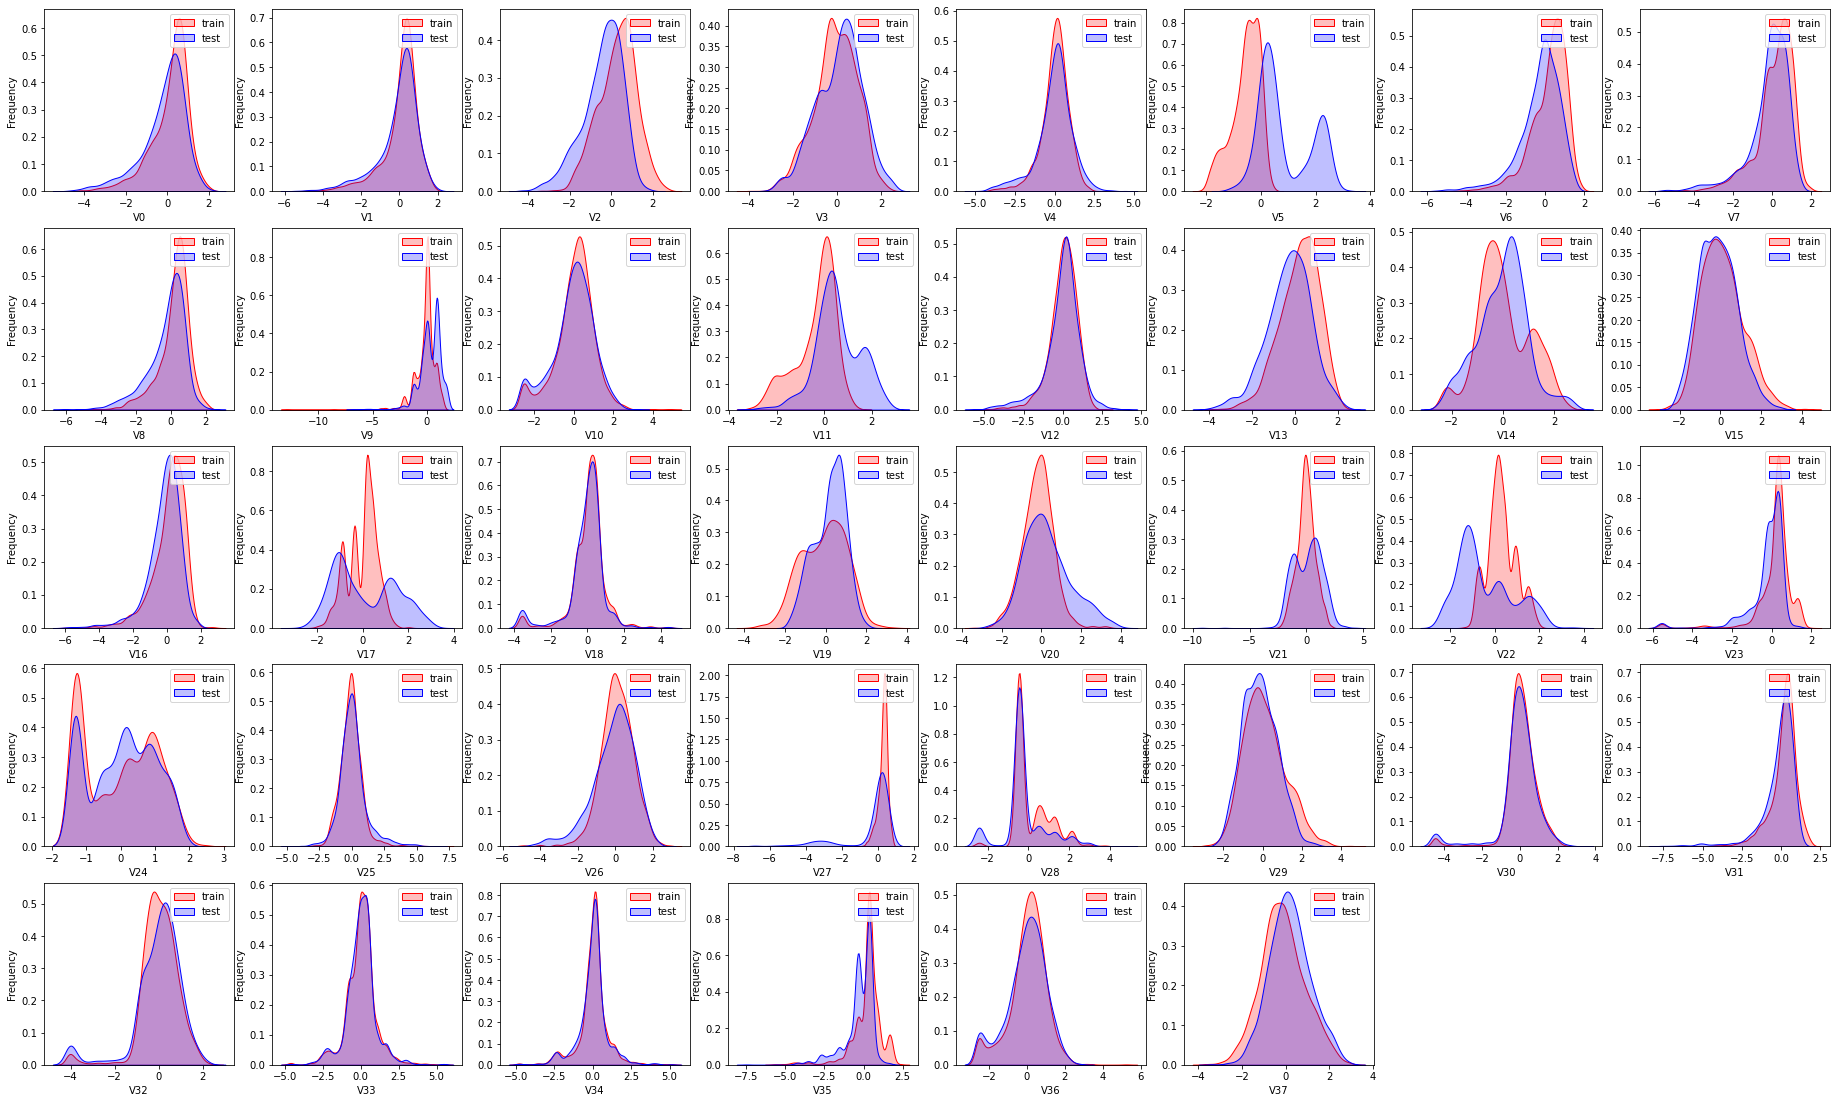

In [15]:

dist_cols = 8
dist_rows = len(test_data.columns)
plt.figure(figsize=(4*dist_cols,4*dist_rows))

i=1
for col in test_data.columns:
    ax = plt.subplot(dist_rows, dist_cols, i)
    ax = sns.kdeplot(train_data[col], color='red', shade=True)
    ax = sns.kdeplot(test_data[col], color='Blue',shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax =ax.legend(["train","test"])
    i+=1
    
plt.show()

## KDE 分布图

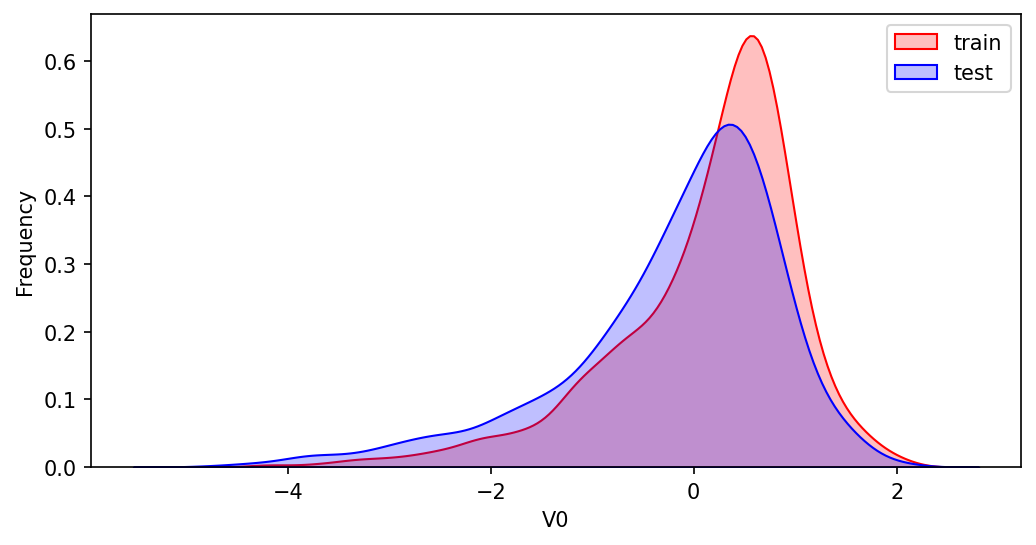

In [16]:
plt.figure(figsize=(8, 4), dpi=150)
ax = sns.kdeplot(train_data['V0'], color="Red", shade=True)
ax = sns.kdeplot(test_data['V0'], color="Blue", shade=True)
ax.set_xlabel('V0')
ax.set_ylabel('Frequency')
ax = ax.legend(["train", "test"])

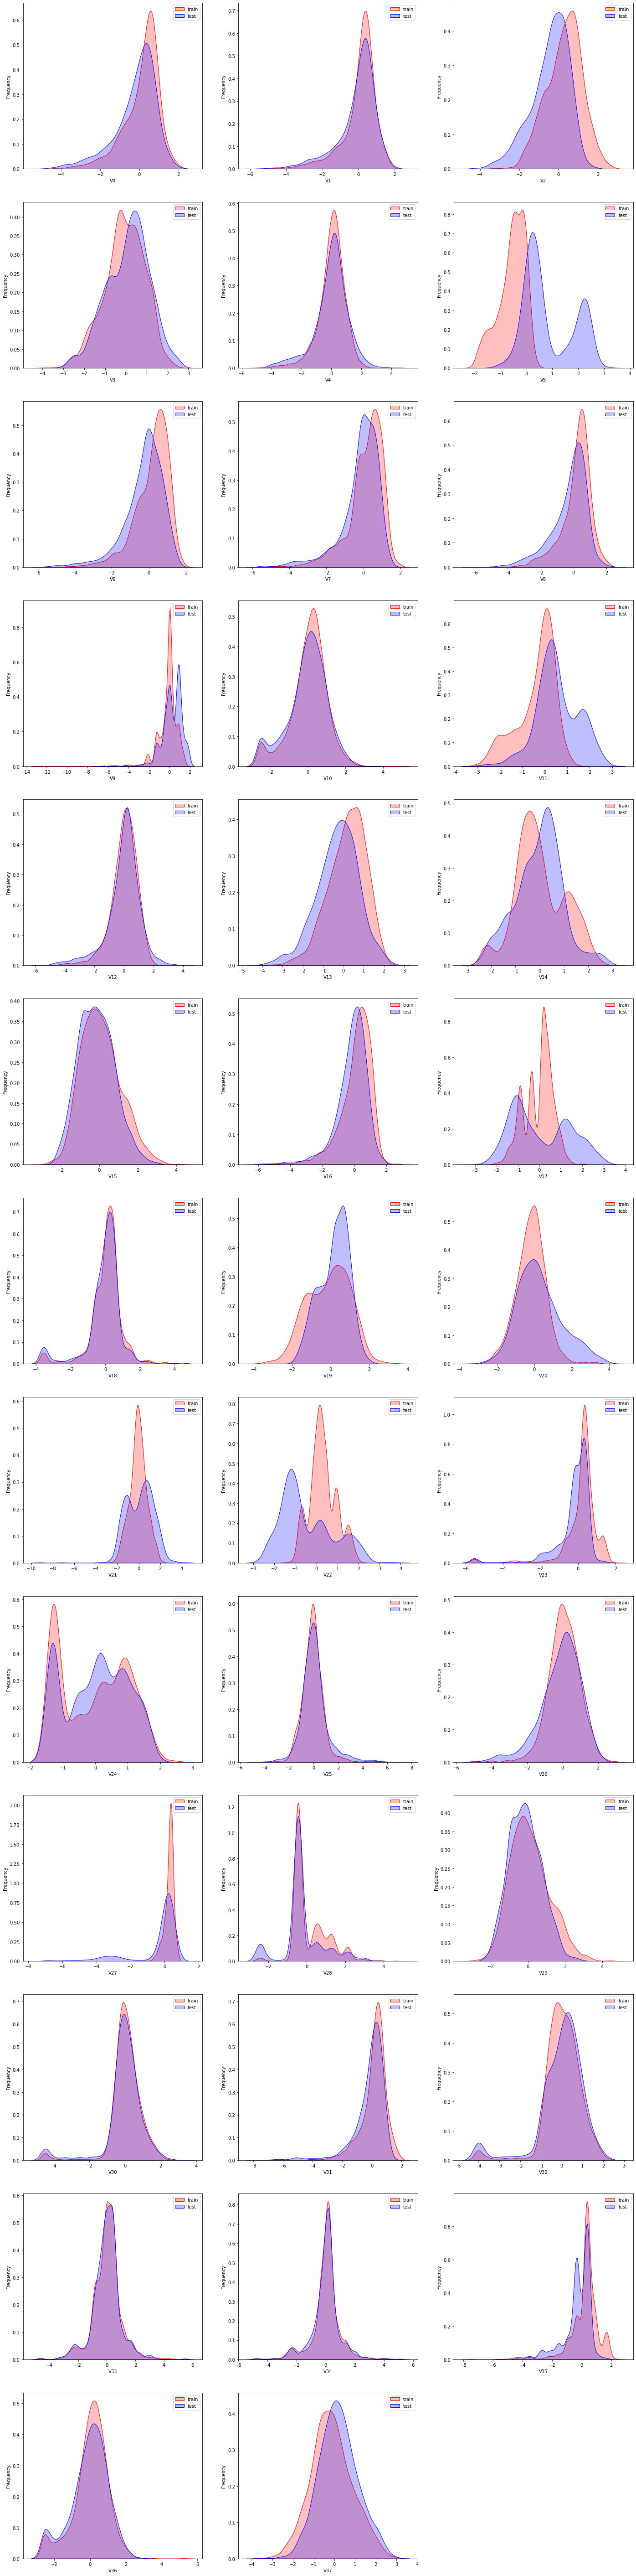

In [17]:
dist_cols = 3
dist_rows = len(test_data.columns)
plt.figure(figsize=(8 * dist_cols, 8 * dist_rows))
i = 1
for col in test_data.columns:
    ax = plt.subplot(dist_rows, dist_cols, i)
    ax = sns.kdeplot(train_data[col], color="Red", shade=True)
    ax = sns.kdeplot(test_data[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax = ax.legend(["train", "test"])
    i += 1
plt.show()

## 线性关系回归图

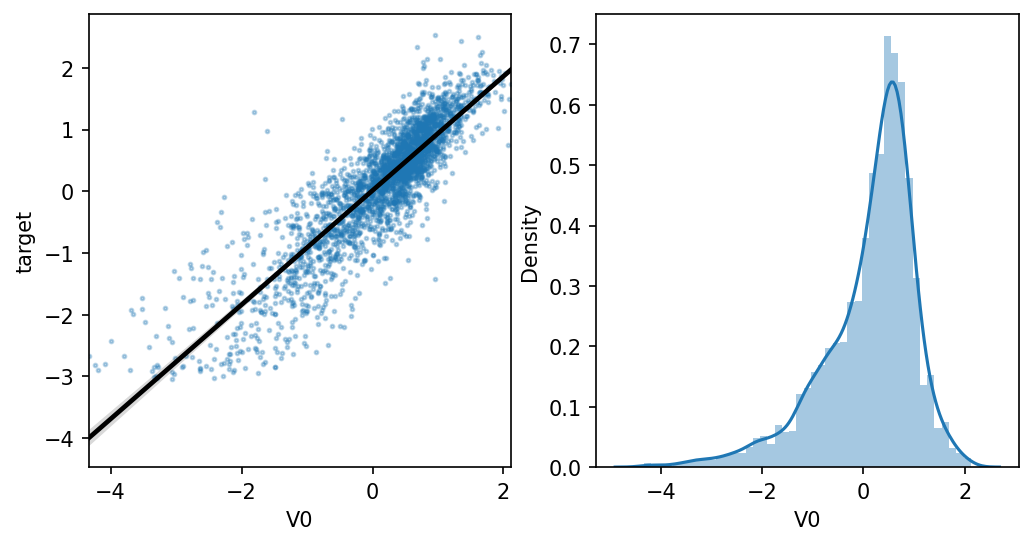

In [18]:
fcols = 2
frows = 1
plt.figure(figsize=(8,4), dpi = 150)

ax = plt.subplot(1, 2, 1)
sns.regplot(x='V0', y='target', data=train_data, ax=ax,
           scatter_kws={'marker': '.', 's': 3, 'alpha': 0.3},
            line_kws={'color': 'k'})
plt.xlabel('V0')
plt.ylabel('target')
ax = plt.subplot(1,2,2)
sns.distplot(train_data['V0'].dropna())
plt.xlabel('V0')
plt.show()

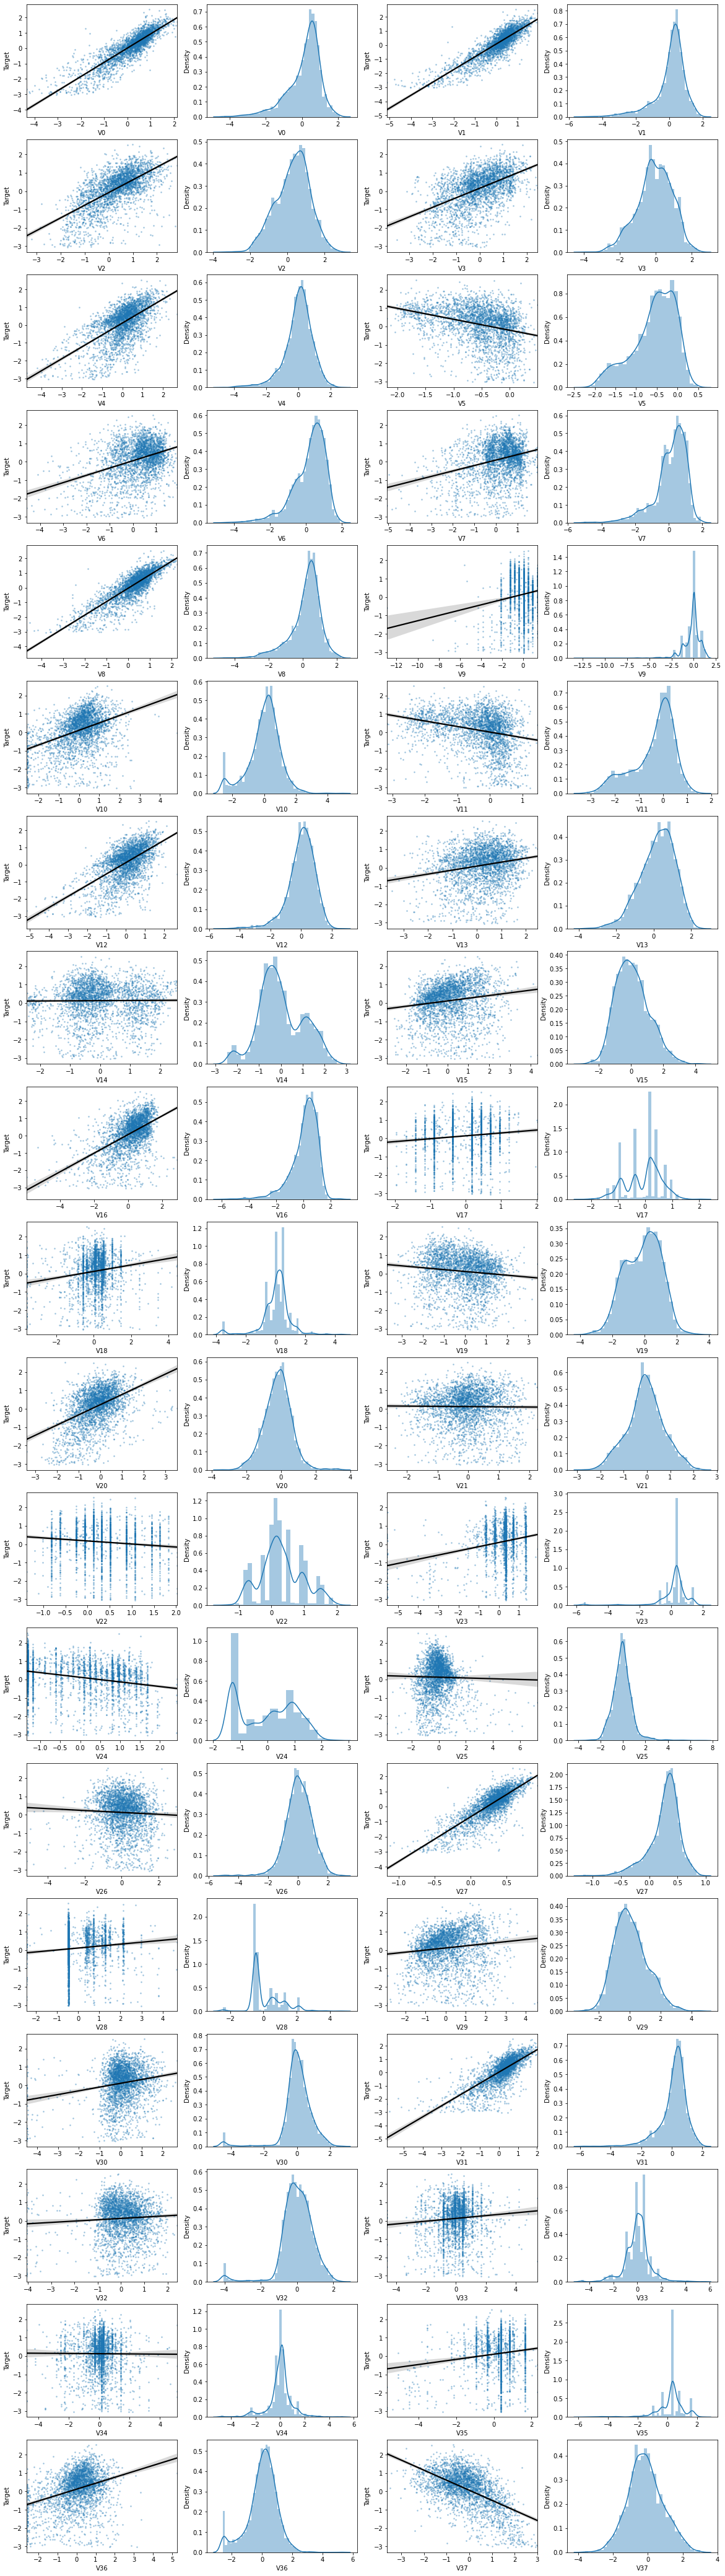

In [19]:
fcols = 4
frows = len(test_data.columns)
plt.figure(figsize=(5*fcols,4*frows))

i=0
for col in test_data.columns:
    i+=1
    ax = plt.subplot(frows, fcols, i)
    sns.regplot(x=col, y= 'target', data=train_data, ax=ax, scatter_kws={'marker':'.','s':3,'alpha':0.3}, line_kws={'color':'k'})
    ax.set_xlabel(col)
    ax.set_ylabel("Target")
    
    i+=1
    ax = plt.subplot(frows, fcols, i)
    sns.distplot(train_data[col].dropna())
    plt.xlabel(col)
    
plt.show()

## 2.2.5 查看特征变量的相关性

## 1，计算相关性系数

In [20]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
data_train1 = train_data.drop(['V5','V9','V11','V17','V22','V28'],axis=1)

train_corr = data_train1.corr()
train_corr

V0        V1        V2        V3        V4  ...       V34  \
V0      1.000000  0.908607  0.463643  0.409576  0.781212  ... -0.019342   
V1      0.908607  1.000000  0.506514  0.383924  0.657790  ... -0.029115   
V2      0.463643  0.506514  1.000000  0.410148  0.057697  ... -0.025620   
V3      0.409576  0.383924  0.410148  1.000000  0.315046  ... -0.031898   
V4      0.781212  0.657790  0.057697  0.315046  1.000000  ...  0.028659   
...          ...       ...       ...       ...       ...  ...       ...   
V34    -0.019342 -0.029115 -0.025620 -0.031898  0.028659  ...  1.000000   
V35     0.138933  0.146329  0.043648  0.080034  0.100010  ...  0.233616   
V36     0.231417  0.235299  0.316462  0.324475  0.113609  ... -0.019032   
V37    -0.494076 -0.494043 -0.734956 -0.229613 -0.031054  ... -0.006854   
target  0.873212  0.871846  0.638878  0.512074  0.603984  ... -0.006034   

             V35       V36       V37    target  
V0      0.138933  0.231417 -0.494076  0.873212  
V1      0.146329  0.235299 -0.494043  0.871846  
V2      0.043648  0.316462 -0.734956  0.638878  
V3      0.080034  0.324475 -0.229613  0.512074  
V4      0.100010  0.113609 -0.031054  0.603984  
...          ...       ...       ...       ...  
V34     0.233616 -0.019032 -0.006854 -0.006034  
V35     1.000000  0.025401 -0.077991  0.140294  
V36     0.025401  1.000000 -0.039478  0.319309  
V37    -0.077991 -0.039478  1.000000 -0.565795  
target  0.140294  0.319309 -0.565795  1.000000  

[33 rows x 33 columns]

## 2, 画出相关热力图

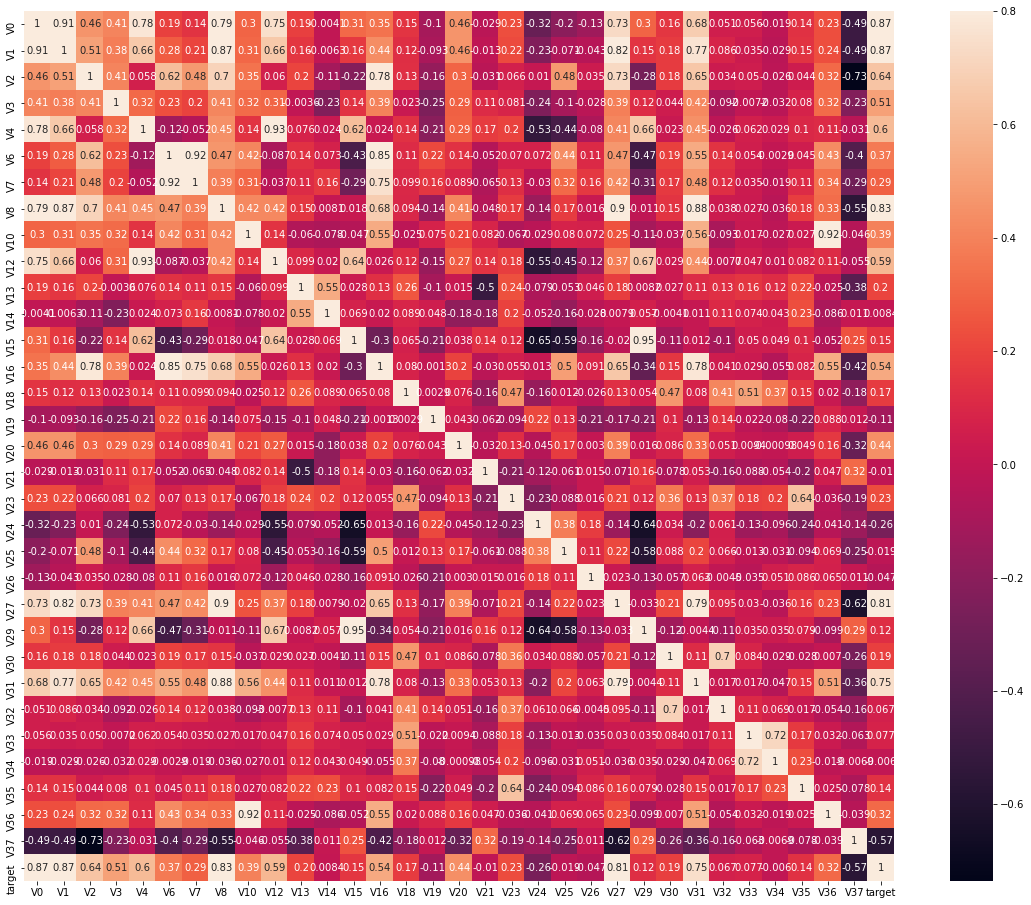

In [21]:
ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(train_corr, vmax=.8, square=True, annot=True)
annot = True

## 3， 根据相关系数筛选特征变量

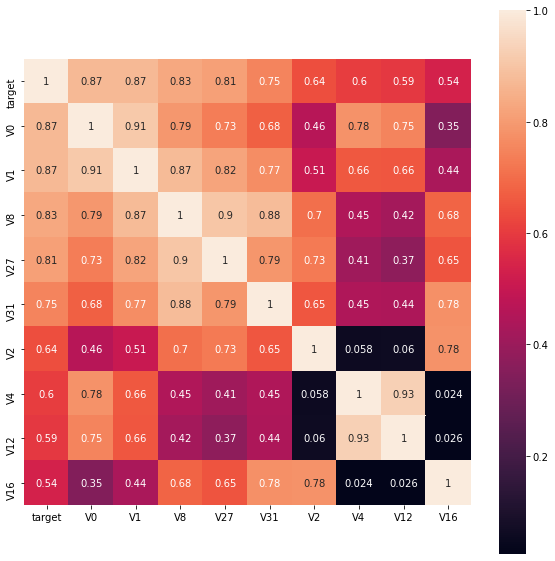

In [22]:
k = 10
cols = train_corr.nlargest(k, 'target')['target'].index

cm = np.corrcoef(train_data[cols].values.T)
hm = plt.subplots(figsize=(10, 10))
hm = sns.heatmap(train_data[cols].corr(), annot=True, square=True)
plt.show()

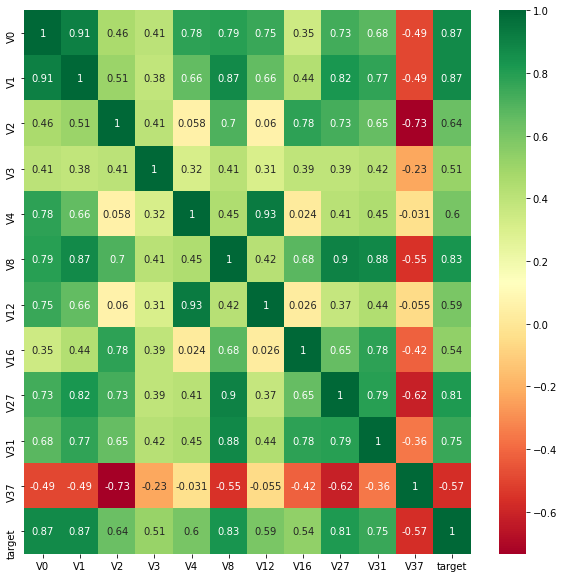

In [23]:
threshold = 0.5

corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["target"]) > threshold]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [24]:
threshold = 0.5

# 相关性系数
corr_matrix = data_train1.corr().abs()
drop_col=corr_matrix[corr_matrix["target"]<threshold].index
# data_all.drop(drop_col, axis=1, inplace=True)

In [25]:
drop_col

Index(['V6', 'V7', 'V10', 'V13', 'V14', 'V15', 'V18', 'V19', 'V20', 'V21',
       'V23', 'V24', 'V25', 'V26', 'V29', 'V30', 'V32', 'V33', 'V34', 'V35',
       'V36'],
      dtype='object')

In [26]:
drop_columns = ['V5','V9','V11','V17','V22','V28']
train_x = train_data.drop(['target'],axis=1)
# 合并训练集和测试集的数据
data_all =pd.concat([train_x,test_data])
data_all.drop(drop_columns,axis=1, inplace =True)
data_all.head()

V0     V1     V2     V3     V4  ...    V33    V34    V35    V36    V37
0  0.566  0.016 -0.143  0.407  0.452  ... -4.627 -4.789 -5.101 -2.608 -3.508
1  0.968  0.437  0.066  0.566  0.194  ... -0.843  0.160  0.364 -0.335 -0.730
2  1.013  0.568  0.235  0.370  0.112  ... -0.843  0.160  0.364  0.765 -0.589
3  0.733  0.368  0.283  0.165  0.599  ... -0.843 -0.065  0.364  0.333 -0.112
4  0.684  0.638  0.260  0.209  0.337  ... -0.843 -0.215  0.364 -0.280 -0.028

[5 rows x 32 columns]

In [27]:
cols_numeric = list(data_all.columns)

def scale_minmax(col):
    return (col - col.min()) / (col.max() - col.min())

data_all[cols_numeric] = data_all[cols_numeric].apply(scale_minmax,axis=0)
data_all[cols_numeric].describe()

V0           V1           V2           V3           V4  ...  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  ...   
mean      0.694172     0.721357     0.602300     0.603139     0.523743  ...   
std       0.144198     0.131443     0.140628     0.152462     0.106430  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.626676     0.679416     0.514414     0.503888     0.478182  ...   
50%       0.729488     0.752497     0.617072     0.614270     0.535866  ...   
75%       0.790195     0.799553     0.700464     0.710474     0.585036  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V33          V34          V35          V36          V37  
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  
mean      0.458493     0.483790     0.762873     0.332385     0.545795  
std       0.099095     0.101020     0.102037     0.127456     0.150356  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.409037     0.454490     0.727273     0.270584     0.445647  
50%       0.454518     0.499949     0.800020     0.347056     0.539317  
75%       0.500000     0.511365     0.800020     0.414861     0.643061  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 32 columns]

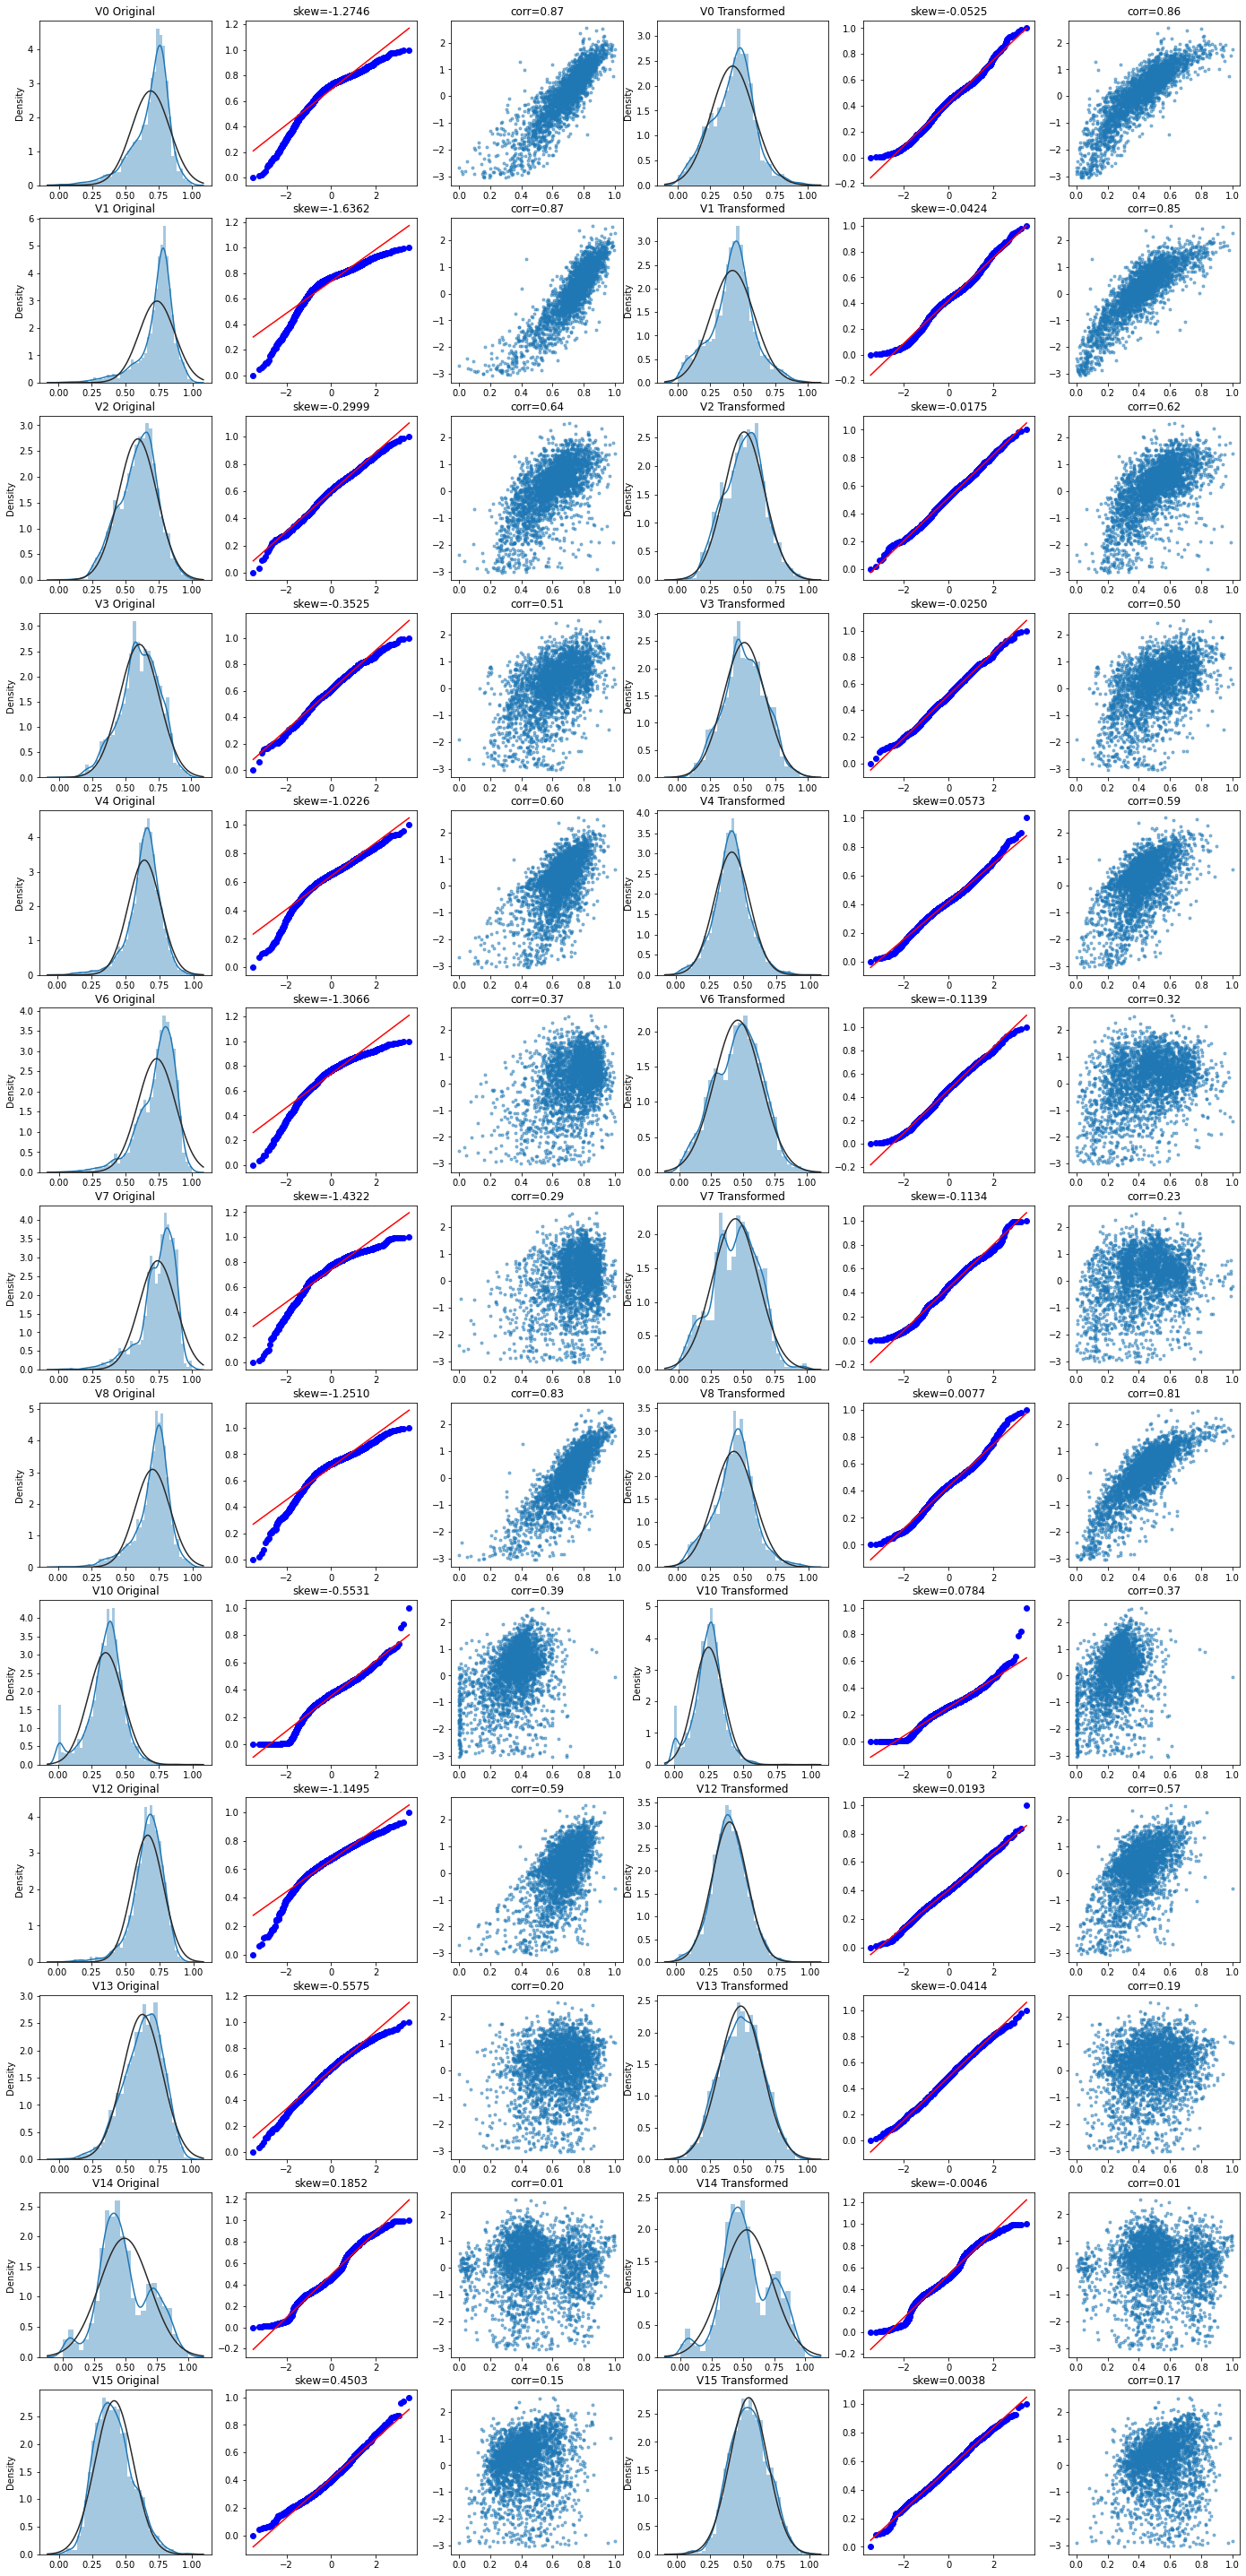

In [28]:
train_data_process = train_data[cols_numeric]
train_data_process = train_data_process[cols_numeric].apply(scale_minmax,axis=0)

cols_numeric_left = cols_numeric[0:13]
cols_numeric_right = cols_numeric[13:]
train_data_process = pd.concat([train_data_process, train_data['target']],axis=1)

fcols = 6
frows = len(cols_numeric_left)
plt.figure(figsize=(4*fcols,4*frows))
i = 0

for var in cols_numeric_left:
    dat = train_data_process[[var, 'target']].dropna()
    i+=1
    plt.subplot(frows,fcols,i)
    sns.distplot(dat[var],fit=stats.norm)
    plt.title(var+' Original')
    plt.xlabel('')
    i+=1
    plt.subplot(frows,fcols,i)
    _ = stats.probplot(dat[var],plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(dat[var])))
    plt.xlabel('')
    plt.ylabel('')
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(dat[var],dat['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[var],dat['target'])[0][1]))
    i+=1
    plt.subplot(frows,fcols,i)
    trans_var, lambda_var = stats.boxcox(dat[var].dropna() + 1)
    trans_var = scale_minmax(trans_var)
    sns.distplot(trans_var,fit=stats.norm)
    plt.title(var+' Transformed')
    plt.xlabel('')
    i+=1
    plt.subplot(frows,fcols,i)
    _ = stats.probplot(trans_var,plot=plt)
    plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
    plt.xlabel('')
    plt.ylabel('')
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(trans_var,dat['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var,dat['target'])[0][1]))

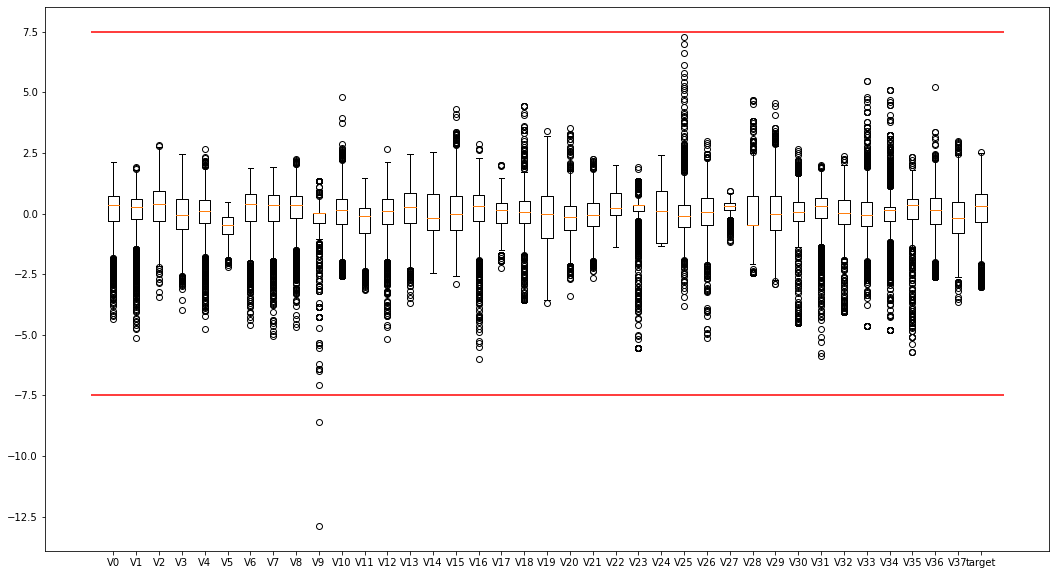

In [29]:
plt.figure(figsize=(18,10))
plt.boxplot(x = train_data.values, labels = train_data.columns)
plt.hlines([-7.5,7.5],0,40,colors='r')
plt.show()

In [30]:
train_data = train_data[train_data['V9']>-7.5]
test_data = test_data[test_data['V9']>-7.5]
display(train_data.describe())
display(test_data.describe())

V0           V1           V2           V3           V4  ...  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  ...   
mean      0.123725     0.056856     0.290340    -0.068364     0.012254  ...   
std       0.927984     0.941269     0.911231     0.970357     0.888037  ...   
min      -4.335000    -5.122000    -3.420000    -3.956000    -4.742000  ...   
25%      -0.292000    -0.224250    -0.310000    -0.652750    -0.385000  ...   
50%       0.359500     0.273000     0.386000    -0.045000     0.109500  ...   
75%       0.726000     0.599000     0.918750     0.623500     0.550000  ...   
max       2.121000     1.918000     2.828000     2.457000     2.689000  ...   

               V34          V35          V36          V37       target  
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  
mean      0.006959     0.198513     0.030099    -0.131957     0.127451  
std       1.003411     0.985058     0.970258     1.015666     0.983144  
min      -4.789000    -5.695000    -2.608000    -3.630000    -3.044000  
25%      -0.290000    -0.199750    -0.412750    -0.798750    -0.347500  
50%       0.160000     0.364000     0.137000    -0.186000     0.314000  
75%       0.273000     0.602000     0.643750     0.493000     0.793750  
max       5.110000     2.324000     5.238000     3.000000     2.538000  

[8 rows x 39 columns]

V0           V1           V2           V3           V4  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean     -0.184404    -0.083912    -0.434762     0.101671    -0.019172  ...   
std       1.073333     1.076670     0.969541     1.034925     1.147286  ...   
min      -4.814000    -5.488000    -4.283000    -3.276000    -4.921000  ...   
25%      -0.664000    -0.451000    -0.978000    -0.644000    -0.497000  ...   
50%       0.065000     0.195000    -0.267000     0.220000     0.118000  ...   
75%       0.549000     0.589000     0.278000     0.793000     0.610000  ...   
max       2.100000     2.120000     1.946000     2.603000     4.475000  ...   

               V33          V34          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean     -0.011433    -0.009985    -0.296895    -0.046270     0.195735  
std       0.989732     0.995213     0.946896     1.040854     0.940599  
min      -4.627000    -4.789000    -7.477000    -2.608000    -3.346000  
25%      -0.460000    -0.290000    -0.349000    -0.593000    -0.432000  
50%      -0.040000     0.160000    -0.270000     0.083000     0.152000  
75%       0.419000     0.273000     0.364000     0.651000     0.797000  
max       5.465000     5.110000     1.671000     2.861000     3.021000  

[8 rows x 38 columns]

In [31]:
from sklearn import preprocessing

features_columns = [col for col in train_data.columns if col not in ['target']]
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(train_data[features_columns]) 

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns
train_data_scaler['target'] = train_data['target']

display(train_data_scaler.describe())
display(test_data_scaler.describe())

V0           V1           V2           V3           V4  ...  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  ...   
mean      0.690633     0.735633     0.593844     0.606212     0.639787  ...   
std       0.143740     0.133703     0.145844     0.151311     0.119504  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.626239     0.695703     0.497759     0.515087     0.586328  ...   
50%       0.727153     0.766335     0.609155     0.609855     0.652873  ...   
75%       0.783922     0.812642     0.694422     0.714096     0.712152  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V34          V35          V36          V37       target  
count  2886.000000  2886.000000  2886.000000  2886.000000  2884.000000  
mean      0.484489     0.734944     0.336235     0.527608     0.127274  
std       0.101365     0.122840     0.123663     0.153192     0.983462  
min       0.000000     0.000000     0.000000     0.000000    -3.044000  
25%       0.454490     0.685279     0.279792     0.427036    -0.348500  
50%       0.499949     0.755580     0.349860     0.519457     0.313000  
75%       0.511365     0.785260     0.414447     0.621870     0.794250  
max       1.000000     1.000000     1.000000     1.000000     2.538000  

[8 rows x 39 columns]

V0           V1           V2           V3           V4  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean      0.642905     0.715637     0.477791     0.632726     0.635558  ...   
std       0.166253     0.152936     0.155176     0.161379     0.154392  ...   
min      -0.074195    -0.051989    -0.138124     0.106035    -0.024088  ...   
25%       0.568618     0.663494     0.390845     0.516451     0.571256  ...   
50%       0.681537     0.755256     0.504641     0.651177     0.654017  ...   
75%       0.756506     0.811222     0.591869     0.740527     0.720226  ...   
max       0.996747     1.028693     0.858835     1.022766     1.240345  ...   

               V33          V34          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean      0.457349     0.482778     0.673164     0.326501     0.577034  
std       0.098071     0.100537     0.118082     0.132661     0.141870  
min       0.000000     0.000000    -0.222222     0.000000     0.042836  
25%       0.412901     0.454490     0.666667     0.256819     0.482353  
50%       0.454518     0.499949     0.676518     0.342977     0.570437  
75%       0.500000     0.511365     0.755580     0.415371     0.667722  
max       1.000000     1.000000     0.918568     0.697043     1.003167  

[8 rows x 38 columns]

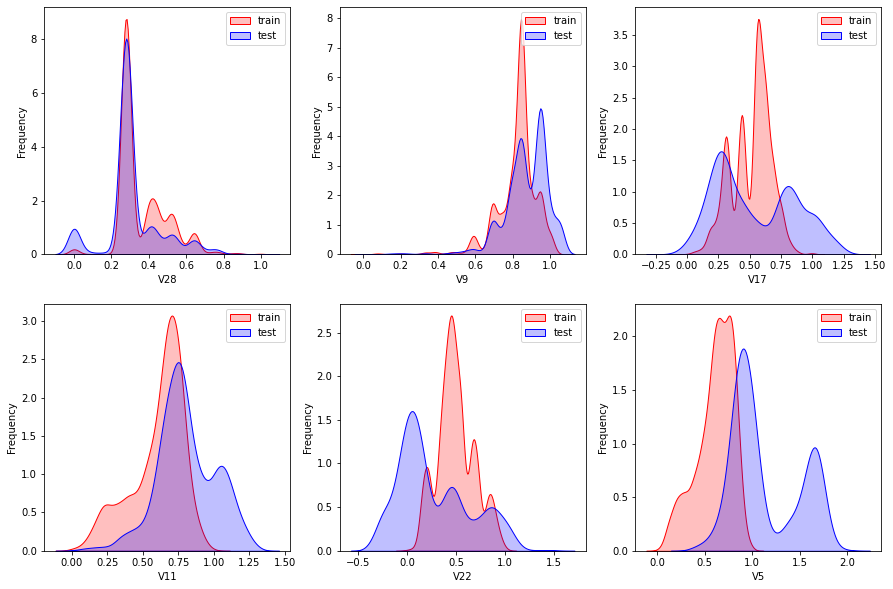

In [32]:
drop_col = 3
drop_row = 2
plt.figure(figsize=(5 * drop_col, 5 * drop_row))

for i, col in enumerate({"V5", "V9", "V11", "V17", "V22", "V28"}):
    ax = plt.subplot(drop_row, drop_col, i + 1)
    ax = sns.kdeplot(train_data_scaler[col], color="Red", shade=True)
    ax = sns.kdeplot(test_data_scaler[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train", "test"])
plt.show()

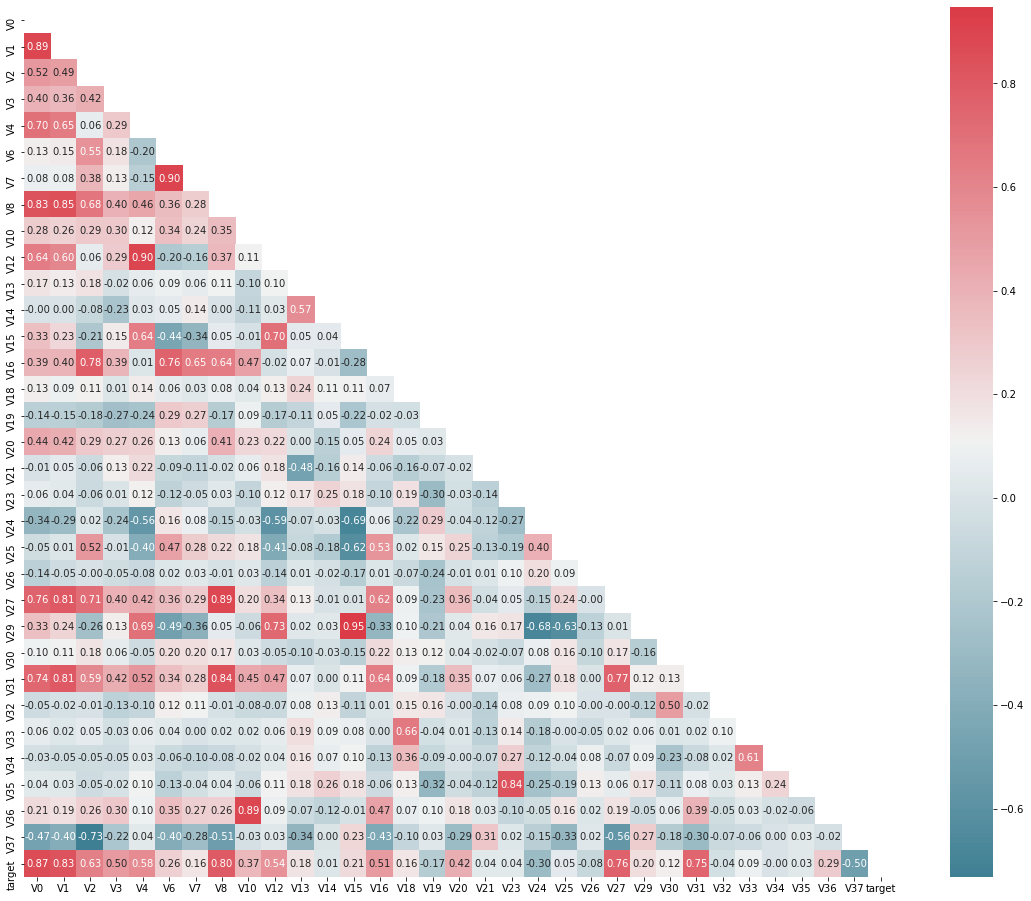

In [33]:
# 找出相关程度
data_train1 = train_data.drop(['V5','V9','V11','V17','V22','V28'],axis=1)

plt.figure(figsize=(20, 16))  # 指定绘图对象宽度和高度
colnm = data_train1.columns.tolist()  # 列表头
mcorr = data_train1[colnm].corr(method="spearman")  # 相关系数矩阵，即给出了任意两个变量之间的相关系数
mask = np.zeros_like(mcorr, dtype=np.bool)  # 构造与mcorr同维数矩阵 为bool型
mask[np.triu_indices_from(mask)] = True  # 角分线右侧为True
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # 返回matplotlib colormap对象
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')  # 热力图（看两两相似度）

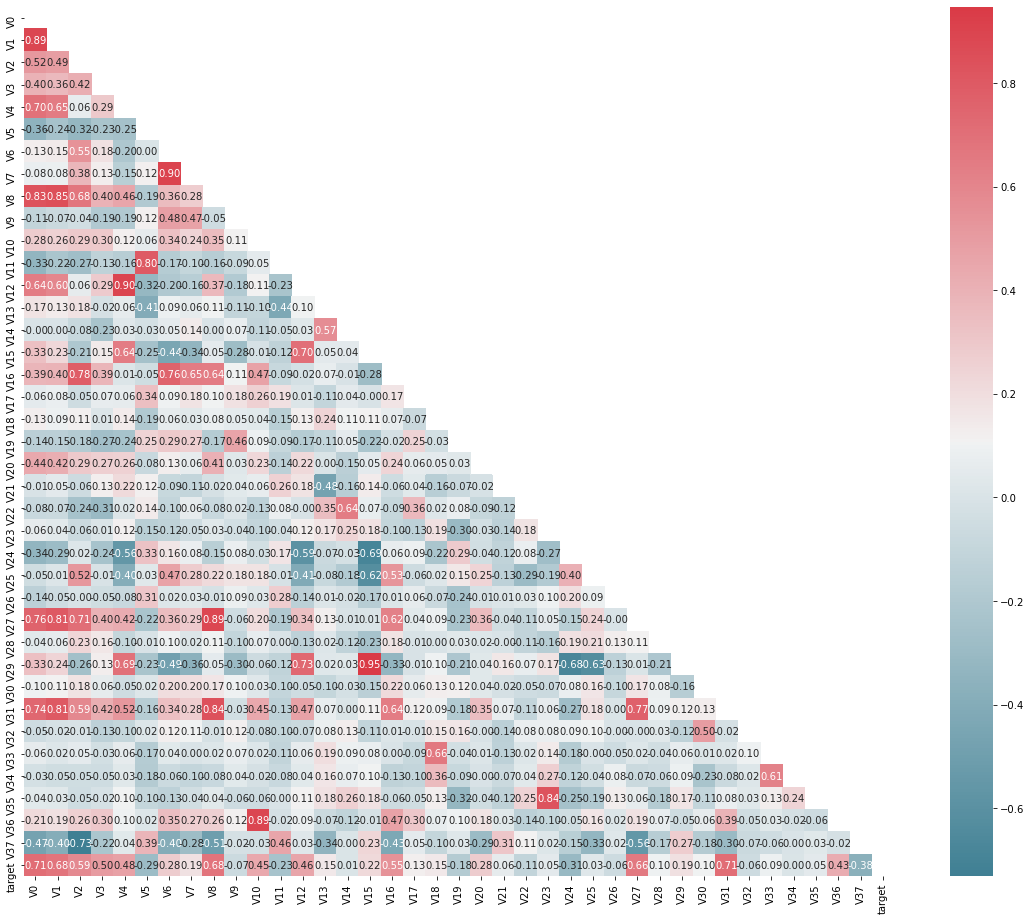

In [34]:
import seaborn as sns

plt.figure(figsize=(20,16))
column = train_data_scaler.columns.tolist()
mcorr = train_data_scaler[column].corr(method="spearman")
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220,10,as_cmap = True)
g = sns.heatmap(mcorr, mask = mask, cmap = cmap, square = True, annot = True, fmt='0.2f')
plt.show()

In [35]:
mcorr = mcorr.abs()
numerical_corr = mcorr[mcorr['target']>0.1]['target']
print(numerical_corr.sort_values(ascending=False))

target    1.000000
V0        0.712403
V31       0.711636
V1        0.682909
V8        0.679469
            ...   
V18       0.149741
V13       0.149199
V17       0.126262
V22       0.112743
V30       0.101378
Name: target, Length: 28, dtype: float64


In [36]:
index0 = numerical_corr.sort_values(ascending = False).index
print(train_data_scaler[index0].corr('spearman'))

          target        V0       V31        V1        V8  ...       V18  \
target  1.000000  0.712403  0.711636  0.682909  0.679469  ...  0.149741   
V0      0.712403  1.000000  0.739116  0.894116  0.832151  ...  0.132143   
V31     0.711636  0.739116  1.000000  0.807585  0.841469  ...  0.094678   
V1      0.682909  0.894116  0.807585  1.000000  0.849034  ...  0.093688   
V8      0.679469  0.832151  0.841469  0.849034  1.000000  ...  0.079592   
...          ...       ...       ...       ...       ...  ...       ...   
V18     0.149741  0.132143  0.094678  0.093688  0.079592  ...  1.000000   
V13     0.149199  0.173861  0.071517  0.134595  0.105380  ...  0.242008   
V17     0.126262  0.055024  0.115056  0.081446  0.102544  ... -0.073678   
V22    -0.112743 -0.076698 -0.106450 -0.072848 -0.078333  ...  0.016819   
V30     0.101378  0.099242  0.131453  0.109216  0.165204  ...  0.133708   

             V13       V17       V22       V30  
target  0.149199  0.126262 -0.112743  0.101378  
V

## 3.4.6 多重线性分析

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #多重共线性方差膨胀因子

#多重共线性
new_numerical=['V0', 'V2', 'V3', 'V4', 'V5', 'V6', 'V10','V11', 
                         'V13', 'V15', 'V16', 'V18', 'V19', 'V20', 'V22','V24','V30', 'V31', 'V37']
X=np.matrix(train_data_scaler[new_numerical])
VIF_list=[variance_inflation_factor(X, i) for i in range(X.shape[1])]
VIF_list

[216.73387180903222,
 114.38118723828812,
 27.863778129686356,
 201.96436579080174,
 78.93722825798903,
 151.06983667656465,
 14.519604941508451,
 82.69750284665385,
 28.479378440614585,
 27.759176471505945,
 526.6483470743831,
 23.50166642638334,
 19.920315849901424,
 24.640481765008683,
 11.816055964845381,
 4.958208708452915,
 37.09877416736591,
 298.26442986612767,
 47.854002539887034]

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.9)
new_train_pca_90 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_90 = pca.transform(test_data_scaler)
new_train_pca_90 = pd.DataFrame(new_train_pca_90)
new_test_pca_90 = pd.DataFrame(new_test_pca_90)
new_train_pca_90['target'] = train_data_scaler['target']
display(new_train_pca_90.describe())
display(train_data_scaler.describe())

0             1             2             3             4  \
count  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03   
mean   1.370191e-16 -1.062425e-16  1.547426e-17  1.211205e-16  6.285878e-17   
std    3.998976e-01  3.500240e-01  2.938631e-01  2.728023e-01  2.077128e-01   
min   -1.071795e+00 -9.429479e-01 -9.948314e-01 -7.103087e-01 -7.703987e-01   
25%   -2.804085e-01 -2.613727e-01 -2.090797e-01 -1.945196e-01 -1.315620e-01   
50%   -1.417104e-02 -1.277241e-02  2.112166e-02 -2.337401e-02 -5.122797e-03   
75%    2.287306e-01  2.317720e-01  2.069571e-01  1.657590e-01  1.281660e-01   
max    1.597730e+00  1.382802e+00  1.010250e+00  1.448007e+00  1.034061e+00   

       ...            12            13            14            15  \
count  ...  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03   
mean   ... -6.501306e-18 -5.284715e-17 -2.573293e-17  8.106616e-17   
std    ...  1.193301e-01  1.149758e-01  1.133507e-01  1.019259e-01   
min    ... -4.175153e-01 -4.310613e-01 -4.170535e-01 -3.601627e-01   
25%    ... -7.139961e-02 -7.474073e-02 -7.709743e-02 -6.603914e-02   
50%    ... -4.140670e-03  1.054915e-03 -1.758387e-03 -7.533392e-04   
75%    ...  6.786199e-02  7.574868e-02  7.116829e-02  6.357449e-02   
max    ...  5.156118e-01  4.978126e-01  4.673189e-01  4.570870e-01   

            target  
count  2884.000000  
mean      0.127274  
std       0.983462  
min      -3.044000  
25%      -0.348500  
50%       0.313000  
75%       0.794250  
max       2.538000  

[8 rows x 17 columns]

V0           V1           V2           V3           V4  ...  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  ...   
mean      0.690633     0.735633     0.593844     0.606212     0.639787  ...   
std       0.143740     0.133703     0.145844     0.151311     0.119504  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.626239     0.695703     0.497759     0.515087     0.586328  ...   
50%       0.727153     0.766335     0.609155     0.609855     0.652873  ...   
75%       0.783922     0.812642     0.694422     0.714096     0.712152  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V34          V35          V36          V37       target  
count  2886.000000  2886.000000  2886.000000  2886.000000  2884.000000  
mean      0.484489     0.734944     0.336235     0.527608     0.127274  
std       0.101365     0.122840     0.123663     0.153192     0.983462  
min       0.000000     0.000000     0.000000     0.000000    -3.044000  
25%       0.454490     0.685279     0.279792     0.427036    -0.348500  
50%       0.499949     0.755580     0.349860     0.519457     0.313000  
75%       0.511365     0.785260     0.414447     0.621870     0.794250  
max       1.000000     1.000000     1.000000     1.000000     2.538000  

[8 rows x 39 columns]

In [39]:
from sklearn.linear_model import LinearRegression # 线性回归
from sklearn.neighbors import KNeighborsRegressor # K近邻回归
from sklearn.tree import DecisionTreeRegressor # 决策树回归
from sklearn.ensemble import RandomForestRegressor # 随机森林回归
from sklearn.svm import SVR # 支持向量机回归
import lightgbm as lgb # LightGBM模型

from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error # 评价指标

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [40]:
train_data_scaler.describe()

V0           V1           V2           V3           V4  ...  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  ...   
mean      0.690633     0.735633     0.593844     0.606212     0.639787  ...   
std       0.143740     0.133703     0.145844     0.151311     0.119504  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.626239     0.695703     0.497759     0.515087     0.586328  ...   
50%       0.727153     0.766335     0.609155     0.609855     0.652873  ...   
75%       0.783922     0.812642     0.694422     0.714096     0.712152  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V34          V35          V36          V37       target  
count  2886.000000  2886.000000  2886.000000  2886.000000  2884.000000  
mean      0.484489     0.734944     0.336235     0.527608     0.127274  
std       0.101365     0.122840     0.123663     0.153192     0.983462  
min       0.000000     0.000000     0.000000     0.000000    -3.044000  
25%       0.454490     0.685279     0.279792     0.427036    -0.348500  
50%       0.499949     0.755580     0.349860     0.519457     0.313000  
75%       0.511365     0.785260     0.414447     0.621870     0.794250  
max       1.000000     1.000000     1.000000     1.000000     2.538000  

[8 rows x 39 columns]

In [41]:
#PCA方法降维
#保留16个主成分
pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']
new_train_pca_16.describe()

0             1             2             3             4  \
count  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03   
mean   1.346917e-16  8.119900e-17 -6.347429e-19 -1.181776e-16  5.439554e-17   
std    3.998976e-01  3.500240e-01  2.938631e-01  2.728023e-01  2.077128e-01   
min   -1.071795e+00 -9.429479e-01 -9.948314e-01 -7.103087e-01 -7.703985e-01   
25%   -2.804085e-01 -2.613727e-01 -2.090797e-01 -1.945196e-01 -1.315618e-01   
50%   -1.417104e-02 -1.277241e-02  2.112168e-02 -2.337400e-02 -5.122917e-03   
75%    2.287306e-01  2.317720e-01  2.069571e-01  1.657590e-01  1.281662e-01   
max    1.597730e+00  1.382802e+00  1.010250e+00  1.448007e+00  1.034060e+00   

       ...            12            13            14            15  \
count  ...  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03   
mean   ... -1.154078e-18 -3.969067e-17 -3.163917e-17  8.789626e-17   
std    ...  1.193301e-01  1.149758e-01  1.133507e-01  1.019259e-01   
min    ... -4.175546e-01 -4.310352e-01 -4.170089e-01 -3.601643e-01   
25%    ... -7.140791e-02 -7.473405e-02 -7.708510e-02 -6.606344e-02   
50%    ... -4.144756e-03  1.050415e-03 -1.760442e-03 -7.041079e-04   
75%    ...  6.786411e-02  7.576870e-02  7.112141e-02  6.361192e-02   
max    ...  5.156153e-01  4.977768e-01  4.674178e-01  4.571260e-01   

            target  
count  2884.000000  
mean      0.127274  
std       0.983462  
min      -3.044000  
25%      -0.348500  
50%       0.313000  
75%       0.794250  
max       2.538000  

[8 rows x 17 columns]

## 模型训练

In [42]:
from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.neighbors import KNeighborsRegressor  #K近邻回归
from sklearn.tree import DecisionTreeRegressor     #决策树回归
from sklearn.ensemble import RandomForestRegressor #随机森林回归
from sklearn.svm import SVR  #支持向量回归
import lightgbm as lgb #lightGbm模型

from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error #评价指标

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [43]:
#采用 pca 保留16维特征的数据
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

In [44]:
clf = LinearRegression()
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("LinearRegression:   ", score)

LinearRegression:    0.2716990231169899


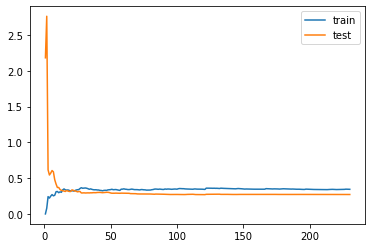

In [46]:
train_score = []
test_score = []

# 给予不同的数据量，查看模型的学习效果
for i in range(10, len(train_data)+1, 10):
    lin_reg = LinearRegression()
    lin_reg.fit(train_data[:i], train_target[:i])
    # LinearRegression().fit(X_train[:i], y_train[:i])
    
    # 查看模型的预测情况：两种，模型基于训练数据集预测的情况(可以理解为模型拟合训练数据集的情况)，模型基于测试数据集预测的情况
    # 此处使用 lin_reg.predict(X_train[:i])，为训练模型的全部数据集
    y_train_predict = lin_reg.predict(train_data[:i])
    train_score.append(mean_squared_error(train_target[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(test_data)
    test_score.append(mean_squared_error(test_target, y_test_predict))
    
# np.sqrt(train_score)：将列表 train_score 中的数开平方
plt.plot([i for i in range(1, len(train_score)+1)], train_score, label='train')
plt.plot([i for i in range(1, len(test_score)+1)], test_score, label='test')

# plt.legend()：显示图例（如图形的 label）；
plt.legend()
plt.show()

In [47]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    """绘制学习曲线：只需要传入算法(或实例对象)、X_train、X_test、y_train、y_test"""
    """当使用该函数时传入算法，该算法的变量要进行实例化，如：PolynomialRegression(degree=2)，变量 degree 要进行实例化"""
    train_score = []
    test_score = []
    for i in range(10, len(X_train)+1, 10):
        algo.fit(X_train[:i], y_train[:i])
        
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    
    plt.plot([i for i in range(1, len(train_score)+1)],
            train_score, label="train")
    plt.plot([i for i in range(1, len(test_score)+1)],
            test_score, label="test")
    
    plt.legend()
    plt.show()

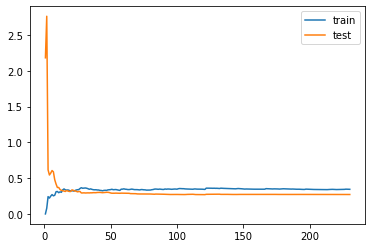

In [49]:
plot_learning_curve(LinearRegression(), train_data, test_data, train_target, test_target)

In [50]:
for i in range(3,20):
    clf = KNeighborsRegressor(n_neighbors=i) # 最近三个
    clf.fit(train_data, train_target)
    score = mean_squared_error(test_target, clf.predict(test_data))
    print("KNeighborsRegressor:   ", score)

KNeighborsRegressor:    0.2675823902345252
KNeighborsRegressor:    0.2704971706314879
KNeighborsRegressor:    0.2661117858823529
KNeighborsRegressor:    0.2747598562572088
KNeighborsRegressor:    0.27801198065108396
KNeighborsRegressor:    0.27352948753784606
KNeighborsRegressor:    0.27610548248536887
KNeighborsRegressor:    0.2741413270934256
KNeighborsRegressor:    0.27892335723069
KNeighborsRegressor:    0.281887705882353
KNeighborsRegressor:    0.28704639268237747
KNeighborsRegressor:    0.29224681551444104
KNeighborsRegressor:    0.2899177887197232
KNeighborsRegressor:    0.2890589019517734
KNeighborsRegressor:    0.2885642401431975
KNeighborsRegressor:    0.28834573186060913
KNeighborsRegressor:    0.2915734071638758


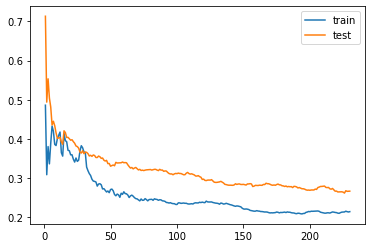

In [51]:
plot_learning_curve(KNeighborsRegressor(n_neighbors=5) , train_data, test_data, train_target, test_target)

In [52]:
clf = DecisionTreeRegressor() 
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("DecisionTreeRegressor:   ", score)

DecisionTreeRegressor:    0.6052038788927336


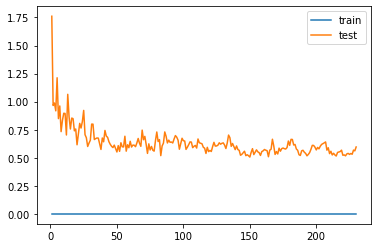

In [53]:
plot_learning_curve(DecisionTreeRegressor(), train_data, test_data, train_target, test_target)

In [54]:
clf = RandomForestRegressor(n_estimators=200) # 200棵树模型
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("RandomForestRegressor:   ", score)

RandomForestRegressor:    0.24446995010484426


In [56]:
plot_learning_curve(RandomForestRegressor(n_estimators=200), train_data, test_data, train_target, test_target)

KeyboardInterrupt: 

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

myGBR = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                                  learning_rate=0.03, loss='huber', max_depth=14,
                                  max_features='sqrt', max_leaf_nodes=None,
                                  min_impurity_decrease=0.0, min_impurity_split=None,
                                  min_samples_leaf=10, min_samples_split=40,
                                  min_weight_fraction_leaf=0.0, n_estimators=300,
                                  presort='auto', random_state=10, subsample=0.8, verbose=0,
                                  warm_start=False)
myGBR.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("GradientBoostingRegressor:   ", score)

GradientBoostingRegressor:    0.24446995010484426


In [58]:
myGBR = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                                  learning_rate=0.03, loss='huber', max_depth=14,
                                  max_features='sqrt', max_leaf_nodes=None,
                                  min_impurity_decrease=0.0, min_impurity_split=None,
                                  min_samples_leaf=10, min_samples_split=40,
                                  min_weight_fraction_leaf=0.0, n_estimators=300,
                                  presort='auto', random_state=10, subsample=0.8, verbose=0,
                                  warm_start=False)

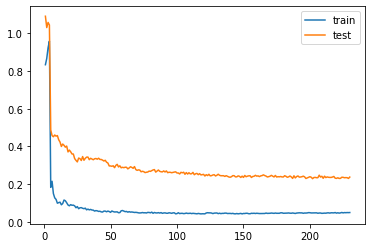

In [59]:
plot_learning_curve(myGBR, train_data, test_data, train_target, test_target)